<a href="https://colab.research.google.com/gist/jonghank/aba80e5f9f23fb735729b9550ace6042/minimum_time_control_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Minimum time control


$$
\newcommand{\eg}{{\it e.g.}}
\newcommand{\ie}{{\it i.e.}}
\newcommand{\argmin}{\operatornamewithlimits{argmin}}
\newcommand{\mc}{\mathcal}
\newcommand{\mb}{\mathbb}
\newcommand{\mf}{\mathbf}
\newcommand{\minimize}{{\text{minimize}}}
\newcommand{\diag}{{\text{diag}}}
\newcommand{\cond}{{\text{cond}}}
\newcommand{\rank}{{\text{rank }}}
\newcommand{\range}{{\mathcal{R}}}
\newcommand{\null}{{\mathcal{N}}}
\newcommand{\tr}{{\text{trace}}}
\newcommand{\dom}{{\text{dom}}}
\newcommand{\dist}{{\text{dist}}}
\newcommand{\R}{\mathbf{R}}
\newcommand{\SM}{\mathbf{S}}
\newcommand{\ball}{\mathcal{B}}
\newcommand{\bmat}[1]{\begin{bmatrix}#1\end{bmatrix}}
$$

__<div style="text-align: right"> ASE7030: Convex Optimization, Inha University. </div>__
_<div style="text-align: right"> Jong-Han Kim (jonghank@inha.ac.kr) </div>_


<br>

A discrete-time linear dynamical system consists of a sequence of state vectors $x_t \in \R^n$, indexed by time $t\in \{0,\dots,N-1\}$ and dynamics equations

$$
\begin{aligned}
  x_{t+1} &= Ax_t + Bu_t 
\end{aligned}
$$

where $u_t\in\R^m$ is a control input to the dynamical system (say, a drive force or steering force on the vehicle). $A$ is the state transition matrix, $B$ is the input matrix. In addition the control input is bounded by

$$
  \| u_t \| \le u_\text{max}
$$

for $t=0,\dots, N-1$.

<br>

Given $A$, $B$, $u_\text{lb}$, and $u_\text{ub}$, the goal is to find the optimal $u_0, \dots, u_{N-1}$ that drives the systems state to the desirable state as quickly as possible. 

In order to formulate the problem, we define the state trasfer time $f\left(u_0,\dots, u_{N-1}\right)$ as follows.

$$
  f\left(u_0,\dots,u_{N-1}\right)=\min\left\{s \mid x_t=x_\text{des}\text{ for } s\le t \le N\right\}
$$

The above state transfer time $f$ is not convex, but it is a quasiconvex function of $(u_0,\dots, u_{N-1} )$ since

$$
  f\left(u_0,\dots,\dots,u_{N-1}\right) \le s
$$

is equivalent to 

$$
x_t =x_\text{des}, \qquad \text{for all } t = s, \dots, N
$$

The set defined by the above represents the sublevel set of the state transfer time $f$. We can conclude that the state transfer time $f$ is quasiconvex, since the sublevel sets are affine in $u_0, \dots, u_{N-1}$.

<br>

Then the minimum time control problem can be formulated as following quasiconvex problem.

\begin{aligned}
  \underset{u_0, \dots, u_{N-1}}{\minimize} \quad & f(u_0, \dots, u_{N-1}) \\
  \text{subject to} \quad & \| u_t \| \le u_\text{max}, \qquad & t=0,\dots,N-1 \\
  \quad & x_{t+1} = Ax_t + Bu_t, \qquad & t=0,\dots,N-1 \\
  \quad & x_N = x_{\text{des}}
\end{aligned}

which can be solved via bisection on the variable $s$ from the following convex feasibility problems.

\begin{aligned}
  {\text{find}} \quad & u_0, \dots, u_{N-1}, x_1, \dots, x_{N} \\
  \text{subject to} \quad & \| u_t \| \le u_\text{max}, \qquad & t=0,\dots,N-1 \\
  \quad & x_{t+1} = Ax_t + Bu_t, \qquad & t=0,\dots,N-1 \\
  \quad & x_t = x_{\text{des}}, \qquad & t=s,\dots, N
\end{aligned}

<br>

We'll consider optimal vehicle guidance problem with state $x_t\in\R^4$, where the first two states are the position of the vehicle in two dimensions, and the last two are the vehicle velocity. The vehicle's control force $u_t\in\R^2$ is acceleration control for the two axes.

Then the following matrices describe the above dynamics.

$$
A = \bmat{
1 & 0 & \left(1-0.5\gamma\Delta t\right)\Delta t & 0 \\
0 & 1 & 0 & \left(1-0.5\gamma\Delta t\right)\Delta t \\
0 & 0 & 1-\gamma\Delta t & 0 \\
0 & 0 & 0 & 1-\gamma\Delta t
} \\
B = \bmat{
0.5\Delta t^2 & 0 \\
0 & 0.5\Delta t^2 \\
\Delta t & 0 \\
0 & \Delta t
} 
$$

We consider the finite horizon of $T=50$, 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 1000 # number of timesteps
T = 50 # time will vary from 0 to T with step delt
ts = np.linspace(0,T,N+1)
delt = T/N
gamma = .05 # damping, 0 is no damping

A = np.zeros((4,4))
B = np.zeros((4,2))
C = np.zeros((2,4))

A[0,0] = 1
A[1,1] = 1
A[0,2] = (1-gamma*delt/2)*delt
A[1,3] = (1-gamma*delt/2)*delt
A[2,2] = 1 - gamma*delt
A[3,3] = 1 - gamma*delt

B[0,0] = delt**2/2
B[1,1] = delt**2/2
B[2,0] = delt
B[3,1] = delt

with $\Delta t=0.05$, with 

$$
  x_0 = \bmat{p_0 \\ v_0} = \bmat{10 \\ -20 \\ 15 \\ -5}
$$

and

$$
u_\text{max} = 1.0
$$

In [2]:
x_0 = np.array([10, -20, 15, -5])
x_des = np.array([100, 50, 0, 0])

u_max = 1.0

<br>

The following code solves for the minimum energy control fot $T=50$ $(N=1000)$.

In [3]:
import cvxpy as cp

x = cp.Variable((4,N+1))  # x_{0},...,x_{N}
u = cp.Variable((2,N))    # u_{0},...,u_{N-1}

obj = cp.Minimize(cp.sum_squares(u))

constr = [ x[:,-1] == x_des, 
           x[:,0]  == x_0    ]
for t in range(N):
    constr += [ x[:,t+1] == A@x[:,t] + B@u[:,t] ]
    constr += [ cp.norm(u[:,t]) <= u_max ]
    
prob = cp.Problem(obj, constr)
prob.solve(verbose=True)

x_cp = np.array(x.value)
u_cp = np.array(u.value)


                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) May 28 10:56:38 AM: Your problem has 6004 variables, 2002 constraints, and 0 parameters.
(CVXPY) May 28 10:56:38 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) May 28 10:56:38 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) May 28 10:56:38 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) May 28 10:56:38 AM: Compiling problem (target solver=ECOS).
(CVXPY) May 28 10:56:38 AM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffi

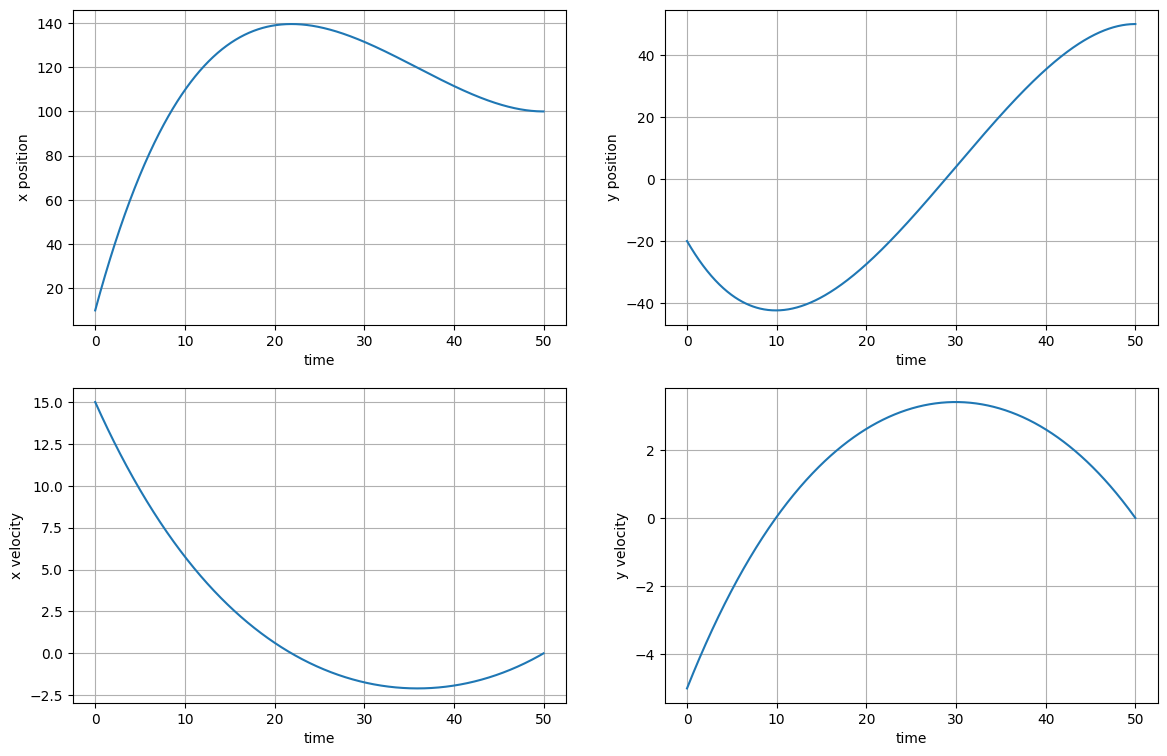

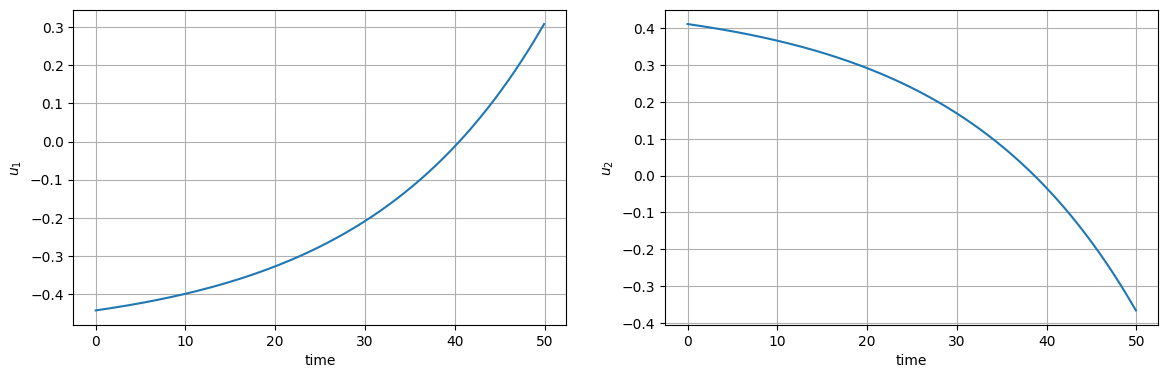

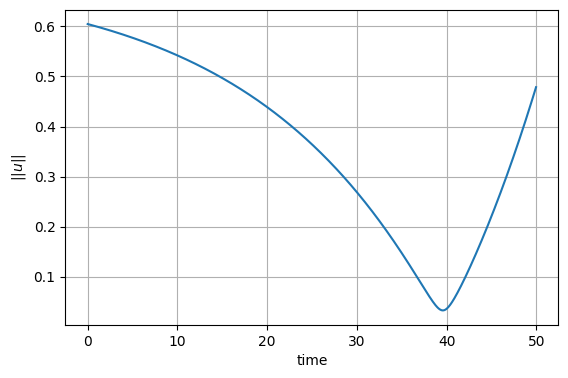

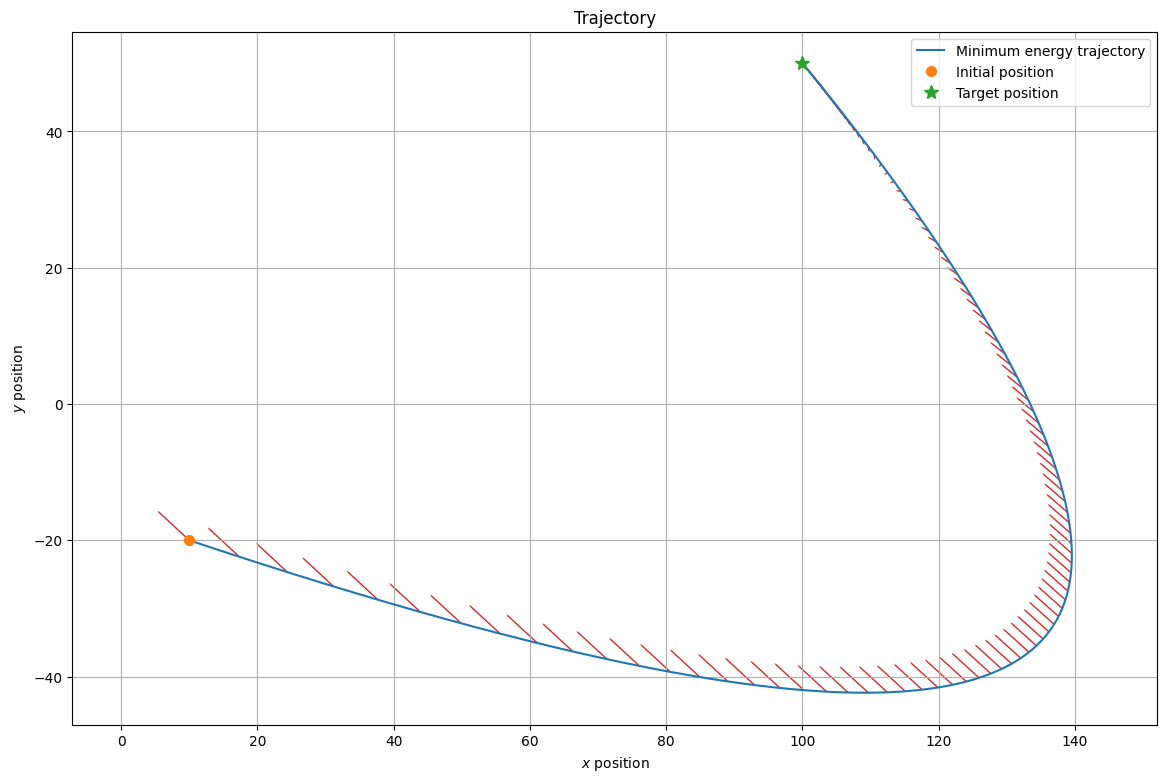

In [4]:
plt.figure(figsize=(14,9), dpi=100)
plt.subplot(2,2,1)
plt.plot(ts,x_cp[0,:])
plt.xlabel('time')
plt.ylabel('x position')
plt.grid()
plt.subplot(2,2,2)
plt.plot(ts,x_cp[1,:])
plt.xlabel('time')
plt.ylabel('y position')
plt.grid()
plt.subplot(2,2,3)
plt.plot(ts,x_cp[2,:])
plt.xlabel('time')
plt.ylabel('x velocity')
plt.grid()
plt.subplot(2,2,4)
plt.plot(ts,x_cp[3,:])
plt.xlabel('time')
plt.ylabel('y velocity')
plt.grid()
plt.show()

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(2,2,1)
plt.plot(ts[:-1],u_cp[0,:])
plt.xlabel('time')
plt.ylabel(r'$u_1$')
plt.grid()
plt.subplot(2,2,2)
plt.plot(ts[:-1],u_cp[1,:])
plt.xlabel('time')
plt.ylabel(r'$u_2$')
plt.grid()
plt.show()

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(2,2,1)
plt.plot(ts[:-1],np.linalg.norm(u_cp,2,axis=0))
plt.xlabel('time')
plt.ylabel(r'$||u||$')
plt.grid()
plt.show()

plt.figure(figsize=(14,9), dpi=100)
plt.plot(x_cp[0,:],x_cp[1,:], label='Minimum energy trajectory')
plt.plot(x_0[0], x_0[1], 'o', markersize=7, label='Initial position')
plt.plot(x_des[0], x_des[1], '*', markersize=10, label='Target position')
plt.title('Trajectory')
plt.legend()
for i in range(0,N-1,10):
  plt.arrow(x_cp[0,i], x_cp[1,i], 10*u_cp[0,i], 10*u_cp[1,i], head_width=0.2, width=0.2, fc='tab:red', ec='none')
plt.axis('equal')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.grid()
plt.show()

<br>

And the following solves for the series of convex feasibility problems using bisection on $s$.

In [5]:
import cvxpy as cp

p_upper = N
p_lower = 0
epsilon = 1

while (p_upper - p_lower > epsilon):
  
  s = int(0.5*(p_upper+p_lower))
  print (f'UB:{p_upper}    LB:{p_lower}')
  
  tm = np.arange(s+1)*delt

  x = cp.Variable((4,s+1))  # x_{0},...,x_{s}
  u = cp.Variable((2,s))    # u_{0},...,u_{s-1}

  obj = cp.Minimize(cp.sum_squares(u))

  constr = [ x[:,-1] == x_des, 
             x[:,0]  == x_0    ]
  for t in range(s):
      constr += [ x[:,t+1] == A@x[:,t] + B@u[:,t] ]
      constr += [ cp.norm(u[:,t]) <= u_max ]
    
  prob = cp.Problem(obj, constr)
  prob.solve(solver=cp.ECOS)
  
  if prob.status == 'optimal':
    p_upper = s
  else:
    p_lower = s

s = p_upper
tm = np.arange(s+1)*delt

x = cp.Variable((4,s+1))  # x_{0},...,x_{s}
u = cp.Variable((2,s))    # u_{0},...,u_{s-1}

obj = cp.Minimize(cp.sum_squares(u))

constr = [ x[:,-1] == x_des, 
           x[:,0]  == x_0    ]
for t in range(s):
    constr += [ x[:,t+1] == A@x[:,t] + B@u[:,t] ]
    constr += [ cp.norm(u[:,t]) <= u_max ]

    
prob = cp.Problem(obj, constr)
prob.solve()
    
x_mt = np.array(x.value)
u_mt = np.array(u.value)

UB:1000    LB:0
UB:1000    LB:500
UB:750    LB:500
UB:625    LB:500
UB:562    LB:500
UB:531    LB:500
UB:531    LB:515
UB:523    LB:515


/usr/local/lib/python3.10/dist-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


UB:523    LB:519
UB:521    LB:519


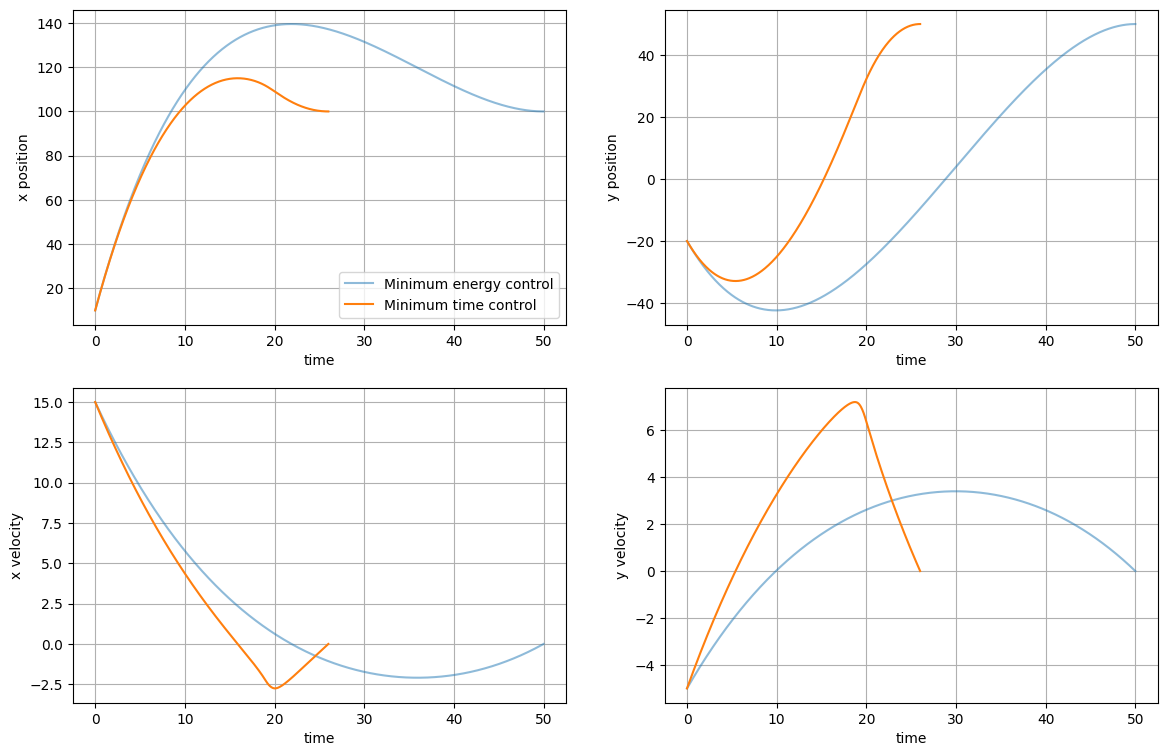

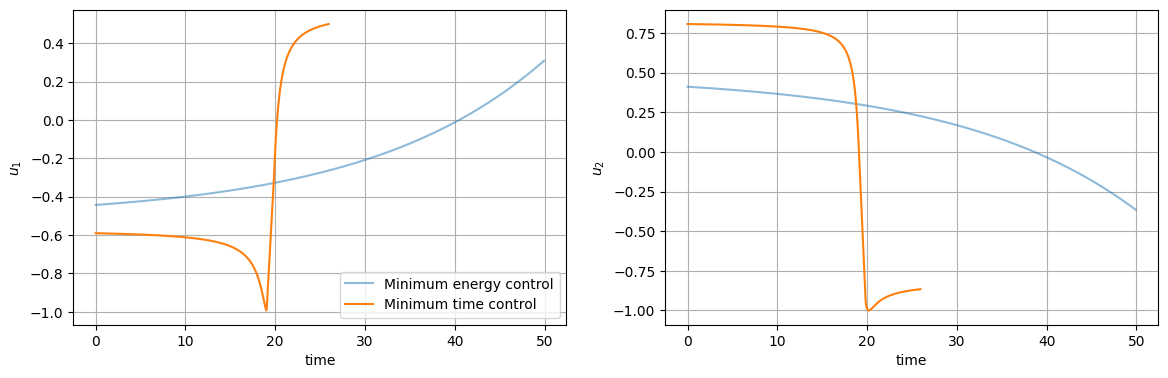

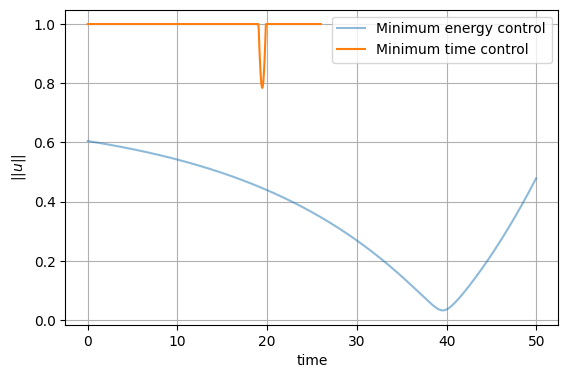

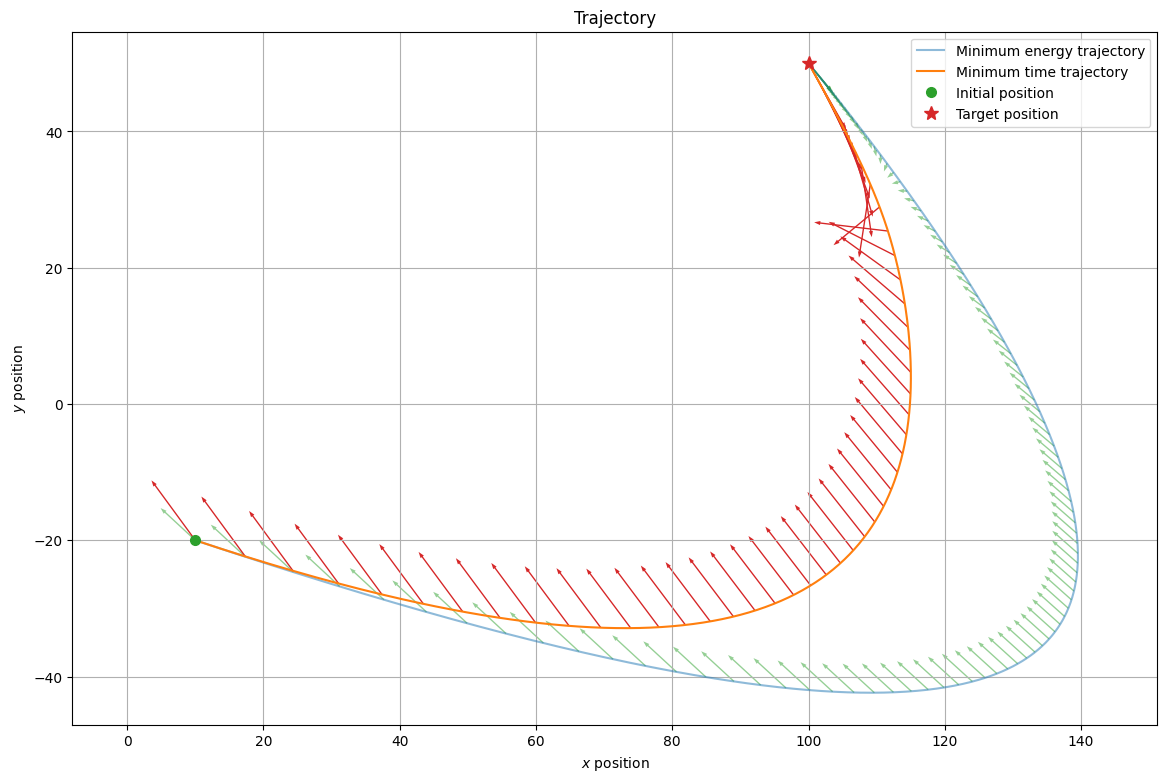

In [6]:
plt.figure(figsize=(14,9), dpi=100)
plt.subplot(2,2,1)
plt.plot(ts,x_cp[0,:], alpha=0.5, label='Minimum energy control')
plt.plot(tm,x_mt[0,:], label='Minimum time control')
plt.xlabel('time')
plt.ylabel('x position')
plt.legend()
plt.grid()
plt.subplot(2,2,2)
plt.plot(ts,x_cp[1,:], alpha=0.5)
plt.plot(tm,x_mt[1,:])
plt.xlabel('time')
plt.ylabel('y position')
plt.grid()
plt.subplot(2,2,3)
plt.plot(ts,x_cp[2,:], alpha=0.5)
plt.plot(tm,x_mt[2,:])
plt.xlabel('time')
plt.ylabel('x velocity')
plt.grid()
plt.subplot(2,2,4)
plt.plot(ts,x_cp[3,:], alpha=0.5)
plt.plot(tm,x_mt[3,:])
plt.xlabel('time')
plt.ylabel('y velocity')
plt.grid()
plt.show()

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(2,2,1)
plt.plot(ts[:-1],u_cp[0,:], alpha=0.5, label='Minimum energy control')
plt.plot(tm[:-1],u_mt[0,:], label='Minimum time control')
plt.xlabel('time')
plt.ylabel(r'$u_1$')
plt.legend()
plt.grid()
plt.subplot(2,2,2)
plt.plot(ts[:-1],u_cp[1,:], alpha=0.5)
plt.plot(tm[:-1],u_mt[1,:])
plt.xlabel('time')
plt.ylabel(r'$u_2$')
plt.grid()
plt.show()

plt.figure(figsize=(14,9), dpi=100)
plt.subplot(2,2,1)
plt.plot(ts[:-1],np.linalg.norm(u_cp,2,axis=0), alpha=0.5, label='Minimum energy control')
plt.plot(tm[:-1],np.linalg.norm(u_mt,2,axis=0), label='Minimum time control')
plt.xlabel('time')
plt.ylabel(r'$||u||$')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(14,9), dpi=100)
plt.plot(x_cp[0,:],x_cp[1,:], alpha=0.5, label='Minimum energy trajectory')
plt.plot(x_mt[0,:],x_mt[1,:], label='Minimum time trajectory')
plt.plot(x_0[0], x_0[1], 'o', markersize=7, label='Initial position')
plt.plot(x_des[0], x_des[1], '*', markersize=10, label='Target position')
plt.title('Trajectory')
plt.legend()
for i in range(0,N-1,10):
  plt.arrow(x_cp[0,i], x_cp[1,i], 10*u_cp[0,i], 10*u_cp[1,i], head_width=0.6, width=0.2, alpha=0.5, fc='tab:green', ec='none')
for i in range(0,s-1,10):
  plt.arrow(x_mt[0,i], x_mt[1,i], 10*u_mt[0,i], 10*u_mt[1,i], head_width=0.6, width=0.2, alpha=1.0, fc='tab:red', ec='none')
plt.axis('equal')
plt.xlabel(r'$x$ position')
plt.ylabel(r'$y$ position')
plt.grid()
plt.show()